# Computer Vision Basics – Lecture 2

**Topic: From Image → Binary → Shapes → Boxes**

### Big Idea (Very Simple)
An image has:

- Background (not important)
- Object (important)

We help the computer **separate** them.

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

# 1. Load Image

In [3]:
image = cv2.imread("cat.jpg")

if image is None:
    print("Image not fount , plz check image name and path , correct this.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


# 2. Convert to RGB and Show

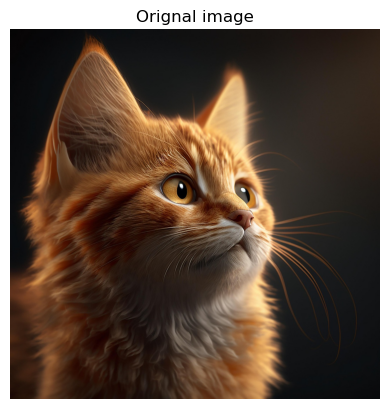

In [4]:
if image is not None:
    image_rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.axis("off")
    plt.title("Orignal image")
    plt.show()

# 3. Convert to Grayscale

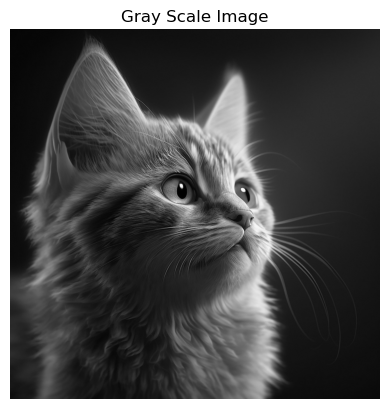

In [5]:
if image is not None:
    gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

    plt.imshow(gray , cmap="gray")
    plt.axis("off")
    plt.title("Gray Scale Image")
    plt.show()

# 4. Binary Image (Black or White)

This step is called **Thresholding.**

Computer decides:

- White (255) → Object
- Black (0) → Background


##  Code

```python
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
```

## What this line does (BIG IDEA)

This line **converts a grayscale image into a pure black-and-white image**
by using a **threshold value**.

## Parameter-by-Parameter Explanation

### **`gray`**

- Input image
-  Must be **grayscale**
-  Har pixel ki value hoti hai **0–255**

### **`120` → Threshold Value**

- Decision point

| Pixel Value | Result |
| ----------- | ------ |
| > 120       | White  |
| ≤ 120       | Black  |

- Matlab:
  - Pixels brighter than 120 → **white**
  - Pixels darker than 120 → **black**

### **`255` → Max Value**

- White color ki value
-  White = **255**

Black automatically **0** hota hai.

### **`cv2.THRESH_BINARY`**

- Threshold ka **type**

Rule:

```
if pixel > threshold → 255 (white)
else → 0 (black)
```


### **`_` (underscore)**

- `cv2.threshold()` **2 values return** karta hai
1. actual threshold value
2. output image

 `_` ka matlab:

> “I don’t need the first value”

### **`binary`**

- Final **black & white image**
- Sirf **0 ya 255** values hoti hain


##   Simple Analogy

> Jaise light switch 🔘

> Bright ho → ON (white)

> Dark ho → OFF (black)

 

## Why Thresholding is Important (ML / CV)

1. Object detection
2. Text extraction
3. Shape detection
4. Noise reduction

Mostly **edge detection se pehle** use hoti hai


##   ONE-LINE 
> `cv2.threshold(gray,120,255,cv2.THRESH_BINARY)` converts a grayscale image into a binary image by turning pixels above 120 to white and others to black.

---

##  Memory Trick

> **Threshold = decision line**

> **Above → white**

> **Below → black**




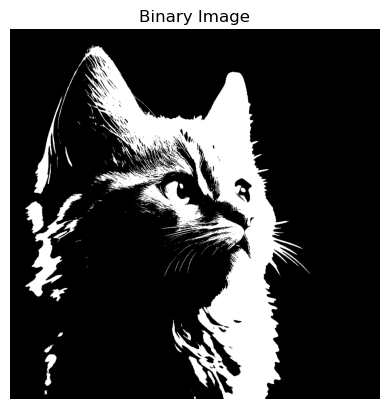

In [21]:
if gray is not None:
    _, binary = cv2.threshold(gray , 90 , 255 , cv2.THRESH_BINARY)

    plt.imshow(binary , cmap="gray")
    plt.axis("off")
    plt.title("Binary Image")
    plt.show()

## 🧠 Think Like a Child
Imagine:

- White = YES
- Black = NO

The computer now sees only YES or NO.

# 5. Find Shapes (Contours)

**Contour means:**

> The outline (border) of an object

The computer draws borders around white areas.


```python
contours, _ = cv2.findContours(
    binary,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)
```

### What this code does (overall):

- It **finds the shapes (objects)** present in a **binary image**.

---

###   `binary`

* This is a **binary image** (only 0 and 255).
* White pixels (255) = **objects**
* Black pixels (0) = **background**
  - Contours are found around **white objects**.

---

###   `cv2.findContours()`

* OpenCV function used to **detect contours (object boundaries)**.
* A **contour** is a set of points forming the outline of an object.

---

###   `cv2.RETR_EXTERNAL`

* This tells OpenCV **which contours to retrieve**.
* `RETR_EXTERNAL` means:
  - **Only outer contours**
  - Ignore inner contours (holes, details inside)

**Example:**
If a donut shape exists → only the **outer circle** is detected.

---

###   `cv2.CHAIN_APPROX_SIMPLE`

* This controls **how contour points are stored**.
* `CHAIN_APPROX_SIMPLE`:
   - Removes unnecessary points
   - Saves memory
   -  Keeps only corner points

**Example:**
A rectangle:

* Without approximation → 100s of points
* With this → only **4 corner points**

---

###   `contours, _`

* `contours` → list of all detected contours
* `_` → hierarchy info (ignored here)

  `_` is used when we **don’t need hierarchy data**.

---

###   One-Line Summary  

`cv2.findContours()` detects object boundaries from a binary image, where `RETR_EXTERNAL` finds only outer objects and `CHAIN_APPROX_SIMPLE` reduces contour points for efficiency.

---

###   Real-Life Example

Think of it like:

* Binary image = **black paper with white shapes**
* Contours = **drawing an outline around each white shape**

 

In [22]:
contours , _ = cv2.findContours(
    binary ,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

print("Total objects founds : " , len(contours))

Total objects founds :  450


**Number of contours depends on the image — there’s no fixed rule.**

### Simple rule:

* **More contours (e.g., 993)** → image has **a lot of noise, small details, or dots**
* **Fewer contours** → image is **clean**, and **real objects are clearly detected**

### In practice (ML / CV projects):

*  **Good result** = contours of **real objects only**
*  **Too many contours** = usually **bad thresholding or no blur**

### Why 993 happened?

* Image not properly **blurred**
* Threshold value not optimal
* **Background noise** is high

### One Line

> More contours usually indicate noise or over-segmentation, while fewer contours represent cleaner and meaningful object detection.


# 6. Draw Boxes Around Objects (WOW Moment)

Now the computer draws **rectangles** around objects.

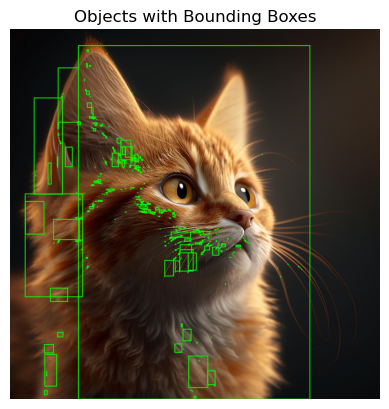

In [23]:
img_box = image.copy()

for cnt in contours:
    x , y , w , h  = cv2.boundingRect(cnt)
    cv2.rectangle(img_box , (x , y) , (x+w  , y+h) , (0 , 255 , 0) , 2)

img_box = cv2.cvtColor(img_box , cv2.COLOR_BGR2RGB)
plt.imshow(img_box)
plt.axis("off")
plt.title("Objects with Bounding Boxes")
plt.show()

#  7. Ignore Small Noise 

Small dots are not real objects. We ignore them using **area size.**

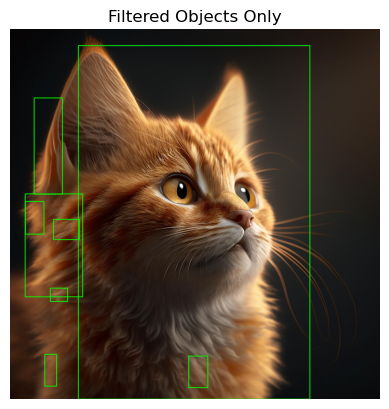

In [26]:
img_clean = image.copy()

for cnt in contours:
    if cv2.contourArea(cnt) > 500:
        x , y , w , h = cv2.boundingRect(cnt)
        cv2.rectangle(img_clean , (x, y) , (x+w , y+h) , (0 , 255 ,0) , 2)
img_clean = cv2.cvtColor(img_clean, cv2.COLOR_BGR2RGB)
plt.imshow(img_clean)
plt.axis("off")
plt.title("Filtered Objects Only")
plt.show()    

## Important Connection to AI (Say This Slowly)
 
> YOLO does the same thing,
but it learns automatically from many images.

Today:
- We told the computer what to do
  
AI:
- The computer learns by itself


# 🏠 Home Assignment 

1. Load any image
2. Convert to grayscale
3. Convert to binary
4. Draw bounding boxes
5. Save the final image

**Goal:** Understand, not memorize.

In [28]:
import cv2 
import matplotlib.pyplot as plt

In [71]:
img = cv2.imread("cat1.jpg")

if img is None:
        print("Image not fount , plz check image name and path , correct this.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


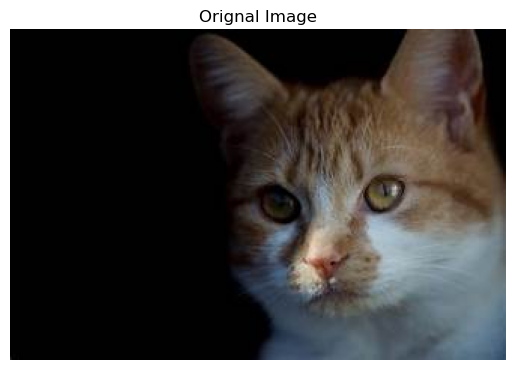

In [72]:
img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.title("Orignal Image")
plt.show()

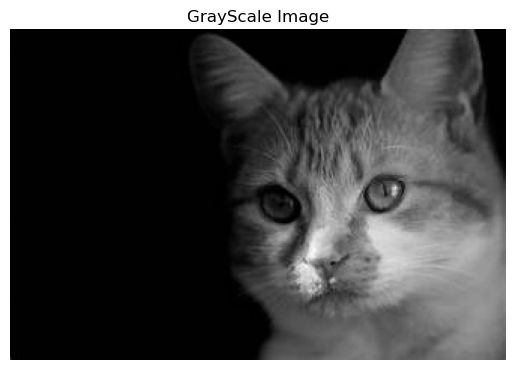

In [73]:
# convert to grayscale

gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

plt.imshow(gray , cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.show()

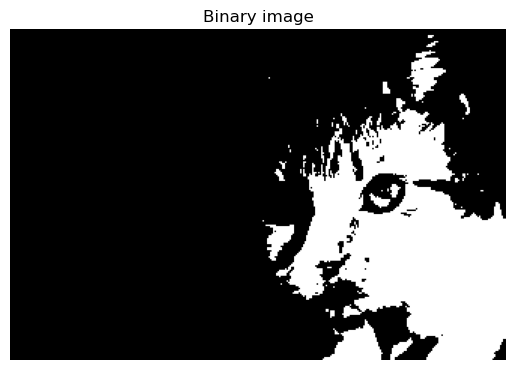

In [80]:
#  convert into binary

_ , binary = cv2.threshold(gray , 90 , 255 , cv2.THRESH_BINARY)

plt.imshow(binary , cmap="gray")
plt.axis("off")
plt.title("Binary image")
plt.show()

In [81]:
# count contours

contours , _ = cv2.findContours(
    binary , 
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

print("Total object found: " , len(contours))

Total object found:  50


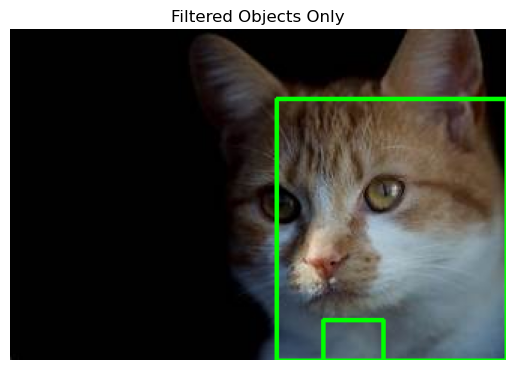

In [82]:
# Draw bounding boxs

img_box = img.copy()

for cnt in contours:
    if cv2.contourArea(cnt) > 500:
        x , y , w , h = cv2.boundingRect(cnt)
        cv2.rectangle(img_box , (x , y)  , (x+w , y+h) , (0 , 255 , 0) , 2)

img_box = cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB)
plt.imshow(img_box)
plt.axis("off")
plt.title("Filtered Objects Only")
plt.show()

#  **Summary (One Screen)**

- Grayscale → removes color information
- Binary → YES / NO (black–white) image
- Contours → object boundaries
- Bounding box → rectangle drawn around the object
-  This is the foundation of **Object Detection**
